In [67]:
from shapely.geometry import Point,Polygon
import cv2
import numpy
def IOU(ground_truth,predicted):
    im1=cv2.imread('C:/Users/Mahendra Pamidi/test/car-damage-detector-master/'+ground_truth,0)
    im2=cv2.imread('C:/Users/Mahendra Pamidi/test/car-damage-detector-master/'+prediction,0)
    total_pixels_x,total_pixels_y=numpy.nonzero(im2)
    res=[list(ele) for ele in list(zip(total_pixels_x,total_pixels_y))]
    results=[]
    poly1=Polygon(list_zipped)
    for i in res:
        point=Point(i)
        if (poly1.contains(point)):
            results.append(i)
    dest=cv2.bitwise_and(im2,im1)
    a,b=numpy.nonzero(dest)
    ored=cv2.bitwise_or(im2,im1)
    c,d = numpy.nonzero(ored)
    print(len(b)/len(c))
    return (len(b)/len(c))

In [68]:
#a=IOU('dst_1.jpg','splash_20200102T131650.png')

In [69]:
import pandas as pd
val_dict={}
import json
def Pixel_level_acc():
    data=pd.DataFrame(pd.read_csv("C:/Users/Mahendra Pamidi/test/car-damage-detector-master/ground_truth/via_export_csv.csv"))
    for row in range(0,data.shape[0]):
        #print('________')
        di=data.iloc[row,5]
        di=json.loads(di)



        #print(type(di),di)


       # print(di.keys)
        if len(list(di.keys()))!=0:
           
           # print(type(di),di)
            zipped=zip(di['all_points_x'],di['all_points_y'])
            #list_zipped.append(list(zipped))
            #print(list(zipped))
            
            filename=data.iloc[row,0]
            val_dict[filename]=list(zipped)
            #print("dict for check",val_dict)
        #print(filename)
    """poly_1 = Polygon(list_zipped)
    results=[]
    for i in res:
        point=Point(i)
        #print(point)
        if (poly_1.contains(point)):
            results.append(i)
    print(len(results)/len(res))"""



In [70]:
Pixel_level_acc()
print(val_dict)

{'000000195.jpg': [(1145, 1349), (1145, 1310), (1138, 1300), (1130, 1293), (1135, 1285), (1144, 1283), (1153, 1266), (1156, 1261), (1164, 1269), (1168, 1278), (1178, 1283), (1183, 1291), (1177, 1305), (1171, 1315), (1172, 1352), (1152, 1356), (1139, 1353)], '000000196.jpg': [(523, 1421), (514, 1365), (496, 1358), (496, 1351), (499, 1348), (516, 1346), (522, 1322), (533, 1330), (540, 1341), (559, 1342), (563, 1348), (561, 1352), (557, 1355), (548, 1356), (548, 1408), (555, 1421), (550, 1428), (523, 1427), (517, 1429)], '000000211.jpg': [(828, 1225), (824, 1189), (833, 1171), (847, 1184), (846, 1194), (844, 1202), (845, 1222)], '000000220.jpg': [(1295, 1360), (1296, 1306), (1282, 1295), (1294, 1288), (1303, 1270), (1312, 1266), (1320, 1274), (1327, 1282), (1335, 1290), (1335, 1303), (1330, 1313), (1326, 1343), (1329, 1367), (1327, 1373), (1294, 1372), (1292, 1367)], '000000221.jpg': [(532, 1470), (517, 1393), (498, 1388), (498, 1380), (517, 1371), (522, 1370), (525, 1352), (535, 1350), (

In [71]:
#list_zipped

In [72]:
import numpy as np
import cv2
import os
c=0
path="C:/Users/Mahendra Pamidi/test/car-damage-detector-master/prediction"
list_gt=os.listdir(path)
for each_img in list_gt:
        img=cv2.imread(path+"/"+each_img)
        #pts=np.array(list_zipped)
        pts=val_dict[each_img]
        pts=np.array(pts)
        print("points are",pts)


        ## (1) Crop the bounding rect
        rect = cv2.boundingRect(pts)
#         print('rectangle',rect)
        x,y,w,h = rect
        #croped = img[y:y+h, x:x+w].copy()
        croped=img.copy()
        ## (2) make mask
        #pts = pts - pts.min(axis=0)

        mask = np.zeros(croped.shape[:2], np.uint8)
        #print("####",mask,mask.shape)
        cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

        ## (3) do bit-op
        dst = cv2.bitwise_and(croped, croped, mask=mask)
        print("Working on "+str(c)+"out of "+str(len(list(val_dict.keys()))))
        c+=1
        #cv2.imwrite(each_gt, dst)
        #cv2.imwrite("mask_1.jpg", mask)
        cv2.imwrite("C:/Users/Mahendra Pamidi/test/car-damage-detector-master/ground_truth"+each_img, dst)
        print("s")
        #cv2.imwrite("dst2.png", dst2)

points are [[1335 1135]
 [1335 1097]
 [1330 1096]
 [1328 1089]
 [1329 1086]
 [1337 1086]
 [1342 1078]
 [1348 1078]
 [1352 1091]
 [1352 1129]
 [1352 1138]]
Working on 0out of 184
s
points are [[1483 1175]
 [1483 1133]
 [1475 1129]
 [1474 1123]
 [1478 1118]
 [1488 1118]
 [1491 1105]
 [1497 1106]
 [1501 1115]
 [1501 1132]
 [1502 1158]
 [1502 1172]
 [1502 1181]
 [1484 1180]]
Working on 1out of 184
s
points are [[ 151 1302]
 [ 147 1238]
 [ 130 1229]
 [ 137 1214]
 [ 146 1214]
 [ 152 1195]
 [ 161 1194]
 [ 164 1200]
 [ 173 1221]
 [ 173 1239]
 [ 173 1258]
 [ 178 1295]
 [ 178 1305]
 [ 157 1305]
 [ 154 1310]]
Working on 2out of 184
s
points are [[ 686 1424]
 [ 684 1320]
 [ 670 1289]
 [ 672 1282]
 [ 677 1278]
 [ 682 1276]
 [ 696 1257]
 [ 703 1252]
 [ 710 1257]
 [ 717 1262]
 [ 717 1280]
 [ 731 1289]
 [ 735 1292]
 [ 735 1301]
 [ 726 1306]
 [ 724 1322]
 [ 722 1341]
 [ 724 1387]
 [ 726 1420]]
Working on 3out of 184
s
points are [[1618 1520]
 [1643 1412]
 [1624 1397]
 [1625 1392]
 [1631 1387]
 [1650 13

s
points are [[1299 1121]
 [1297 1092]
 [1291 1091]
 [1291 1083]
 [1295 1083]
 [1299 1077]
 [1306 1076]
 [1310 1080]
 [1311 1091]
 [1310 1111]
 [1310 1118]
 [1310 1120]]
Working on 37out of 184
s
points are [[1430 1188]
 [1427 1150]
 [1416 1144]
 [1416 1133]
 [1430 1129]
 [1432 1125]
 [1438 1126]
 [1441 1129]
 [1443 1144]
 [1442 1163]
 [1446 1188]]
Working on 38out of 184
s
points are [[  39 1326]
 [  33 1271]
 [  21 1266]
 [  23 1250]
 [  30 1245]
 [  39 1227]
 [  51 1234]
 [  65 1261]
 [  56 1275]
 [  63 1327]]
Working on 39out of 184
s
points are [[ 591 1440]
 [ 584 1376]
 [ 570 1345]
 [ 570 1336]
 [ 586 1336]
 [ 601 1306]
 [ 617 1313]
 [ 626 1334]
 [ 644 1341]
 [ 645 1352]
 [ 645 1361]
 [ 626 1369]
 [ 631 1438]
 [ 633 1454]
 [ 619 1461]
 [ 594 1459]
 [ 586 1455]]
Working on 40out of 184
s
points are [[1659 1587]
 [1675 1496]
 [1657 1489]
 [1655 1478]
 [1664 1468]
 [1678 1471]
 [1694 1443]
 [1699 1443]
 [1706 1436]
 [1713 1443]
 [1722 1471]
 [1738 1483]
 [1738 1492]
 [1731 1501]
 [1

s
points are [[ 502 1437]
 [ 489 1371]
 [ 466 1367]
 [ 466 1358]
 [ 481 1350]
 [ 491 1352]
 [ 493 1331]
 [ 502 1323]
 [ 513 1330]
 [ 519 1342]
 [ 538 1343]
 [ 546 1350]
 [ 544 1356]
 [ 526 1365]
 [ 533 1424]
 [ 540 1438]
 [ 535 1449]
 [ 506 1449]
 [ 496 1446]]
Working on 73out of 184
s
points are [[ 937 1307]
 [ 933 1266]
 [ 925 1266]
 [ 923 1254]
 [ 927 1251]
 [ 933 1251]
 [ 938 1238]
 [ 948 1245]
 [ 952 1264]
 [ 954 1293]
 [ 954 1303]]
Working on 74out of 184
s
points are [[ 553 1244]
 [ 543 1181]
 [ 524 1171]
 [ 529 1164]
 [ 541 1163]
 [ 545 1159]
 [ 557 1144]
 [ 561 1150]
 [ 566 1149]
 [ 569 1167]
 [ 573 1187]
 [ 573 1214]
 [ 578 1242]]
Working on 75out of 184
s
points are [[ 323 1434]
 [ 312 1355]
 [ 296 1352]
 [ 286 1345]
 [ 291 1327]
 [ 310 1322]
 [ 319 1299]
 [ 323 1298]
 [ 326 1289]
 [ 335 1298]
 [ 345 1303]
 [ 356 1345]
 [ 359 1355]
 [ 356 1378]
 [ 363 1419]
 [ 370 1436]
 [ 365 1445]
 [ 338 1447]
 [ 323 1447]
 [ 316 1440]]
Working on 76out of 184
s
points are [[1496 1632]
 [1

points are [[ 400 1275]
 [ 398 1247]
 [ 393 1234]
 [ 395 1222]
 [ 407 1206]
 [ 416 1206]
 [ 424 1227]
 [ 424 1240]
 [ 421 1268]
 [ 421 1275]]
Working on 110out of 184
s
points are [[ 998 1371]
 [ 994 1331]
 [ 991 1308]
 [ 984 1303]
 [ 984 1296]
 [ 998 1289]
 [1003 1273]
 [1020 1275]
 [1022 1292]
 [1038 1299]
 [1035 1312]
 [1029 1317]
 [1028 1369]]
Working on 111out of 184
s
points are [[1438 1152]
 [1438 1129]
 [1434 1127]
 [1434 1116]
 [1436 1113]
 [1446 1107]
 [1451 1110]
 [1454 1120]
 [1453 1144]
 [1453 1156]]
Working on 112out of 184
s
points are [[ 426 1355]
 [ 426 1326]
 [ 416 1317]
 [ 414 1285]
 [ 424 1285]
 [ 452 1282]
 [ 461 1294]
 [ 465 1303]
 [ 463 1317]
 [ 459 1322]
 [ 458 1361]]
Working on 113out of 184
s
points are [[1201 1462]
 [1208 1397]
 [1191 1389]
 [1189 1375]
 [1203 1368]
 [1215 1371]
 [1222 1354]
 [1229 1348]
 [1241 1355]
 [1248 1376]
 [1268 1387]
 [1264 1396]
 [1259 1401]
 [1254 1401]
 [1245 1443]
 [1243 1464]
 [1241 1469]]
Working on 114out of 184
s
points are [

points are [[1385 1235]
 [1388 1185]
 [1378 1179]
 [1375 1173]
 [1377 1167]
 [1390 1163]
 [1396 1152]
 [1403 1150]
 [1409 1152]
 [1413 1163]
 [1413 1180]
 [1415 1201]
 [1413 1228]
 [1414 1238]]
Working on 148out of 184
s
points are [[  43 1187]
 [  41 1164]
 [  38 1159]
 [  45 1144]
 [  49 1144]
 [  54 1154]
 [  54 1165]
 [  57 1184]
 [  57 1187]]
Working on 149out of 184
s
points are [[ 266 1238]
 [ 262 1202]
 [ 262 1189]
 [ 268 1170]
 [ 272 1170]
 [ 279 1179]
 [ 290 1185]
 [ 290 1196]
 [ 282 1201]
 [ 283 1220]
 [ 284 1236]
 [ 284 1242]]
Working on 150out of 184
s
points are [[ 132 1251]
 [ 127 1211]
 [ 120 1208]
 [ 122 1194]
 [ 132 1177]
 [ 137 1177]
 [ 148 1196]
 [ 150 1192]
 [ 149 1202]
 [ 146 1217]
 [ 146 1240]
 [ 148 1247]]
Working on 151out of 184
s
points are [[1144 1152]
 [1139 1109]
 [1131 1108]
 [1135 1097]
 [1143 1094]
 [1147 1085]
 [1152 1087]
 [1158 1095]
 [1160 1107]
 [1161 1126]
 [1161 1146]]
Working on 152out of 184
s
points are [[1312 1221]
 [1308 1172]
 [1295 1165]
 

In [73]:
#l=[]
l=list(val_dict.keys())
print(l)

['000000195.jpg', '000000196.jpg', '000000211.jpg', '000000220.jpg', '000000221.jpg', '000000247.jpg', '000000309.jpg', '000000379.jpg', '000000383.jpg', '000000398.jpg', '000000411.jpg', '000000428.jpg', '000000475.jpg', '000000488.jpg', '000000504.jpg', '000000649.jpg', '000000650.jpg', '000000653.jpg', '000000688.jpg', '000000795.jpg', '000000796.jpg', '000000841.jpg', '000000859.jpg', '000000875.jpg', '000000890.jpg', '000000909.jpg', '000000018.jpg', '000000019.jpg', '000000060.jpg', '000000061.jpg', '000000078.jpg', '000000079.jpg', '000000080.jpg', '000000093.jpg', '000000094.jpg', '000000124.jpg', '000000158.jpg', '000000174.jpg', '000000175.jpg', '000000194.jpg', '000000234.jpg', '000000245.jpg', '000000260.jpg', '000000276.jpg', '000000277.jpg', '000000326.jpg', '000000338.jpg', '000000339.jpg', '000000340.jpg', '000000349.jpg', '000000365.jpg', '000000377.jpg', '000000384.jpg', '000000396.jpg', '000000397.jpg', '000000408.jpg', '000000409.jpg', '000000426.jpg', '000000427.jp

In [74]:
print(len(l))

184


000000195.jpg
0.8156813152070819
________________________
1.1623721881390594
000000196.jpg
0.8368602362204725
________________________
0.6726465364120782
000000211.jpg
0.7836206896551724
________________________
0.1596236890808143
000000220.jpg
0.8108040826487428
________________________
0.3664910649726268
000000221.jpg
0.8675603217158177
________________________
0.3590348079323256
000000247.jpg
0.8325333333333333
________________________
0.19563970166379804
000000309.jpg
0.8570103570876488
________________________
0.2716862675744982
000000379.jpg
0.8260792639773531
________________________
0.18814252551678395
000000383.jpg
0.6988146551724138
________________________
0.057097457627118646
000000398.jpg
0.8801593625498008
________________________
0.17553191489361702
000000411.jpg
0.8365609704192382
________________________
0.11648692766731783
000000428.jpg
0.8377792597532511
________________________
0.13290009283724916
000000475.jpg
0.8643227665706051
________________________
0.163070564

0.7263374485596708
________________________
0.006056698063238376
000001113.jpg
0.7429971988795518
________________________
0.00541714788538745
000001114.jpg
0.8034020281321557
________________________
0.012599896588321738
000001115.jpg
0.8898415172772148
________________________
0.03230054392107639
000001141.jpg
0.6875
________________________
0.003049838938620893
000001143.jpg
0.856928999144568
________________________
0.01920107941203181
000001181.jpg
0.7975171232876712
________________________
0.009232037013987544
000001201.jpg
0.8164616840113529
________________________
0.012633983930421784
000001202.jpg
0.8542623501736306
________________________
0.03545281604888453
000001275.jpg
0.696526508226691
________________________
0.0037855925766254028
000001293.jpg
0.7006802721088435
________________________
0.003401946077105313
000001312.jpg
0.5901639344262295
________________________
0.003133462598892243
000001337.jpg
0.6804925469863902
________________________
0.005573572790534704
0000

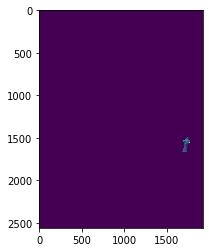

In [75]:
import matplotlib.pyplot as plt
import numpy
#df=pd.DataFrame()
image_nam=[]
resp_IOU=[]
pixel_pred=[]
pixel_gt=[]
pixel_acc=[]
for each_image in l:
    Ground_truth_images=cv2.imread('C:/Users/Mahendra Pamidi/test/car-damage-detector-master/ground_truth'+each_image,0)
    print(each_image)
    predicted_images=cv2.imread('C:/Users/Mahendra Pamidi/test/car-damage-detector-master/prediction/'+each_image,0)
    plt.imshow(predicted_images)


    a1,b1=numpy.nonzero(predicted_images)
    pixel_pred=[list(ele) for ele in list(zip(b1,a1))]
    and_two_images=cv2.bitwise_and(Ground_truth_images,predicted_images)
    a2,b2=numpy.nonzero(and_two_images)
    #print(a1)
    #if a1!=[]: 
    or_two_images=cv2.bitwise_or(Ground_truth_images,predicted_images)
    a3,b3=numpy.nonzero(or_two_images)
    #print(a3)
    #print(each_image)
    print(len(a2)/len(a3))
    image_nam.append(each_image)
    resp_IOU.append(len(a2)/len(a3))
    list_zipped=val_dict[each_image]
    poly_1=Polygon(list_zipped)
    print("________________________")
#     print(len(pixel_pred))
#     print(len(pixel_gt))
#     print("list",list_zipped)
   # print("pixel",pixel_pred)
    
    for i in pixel_pred:
        #print(i)
#         print(list_zipped)
        point=Point(i)
#         print(point)
        if (poly_1.contains(point)):
            pixel_gt.append(i)
#     print(len(pixel_gt))
    pixel_acc.append((len(pixel_pred)/len(pixel_gt)))
    print(pixel_acc[-1])
        
df=pd.DataFrame({"name":image_nam,"IOU_score":resp_IOU,"Pixel_level_acc":pixel_acc})

    
    

In [76]:
print(list_zipped)

[(1680, 1646), (1703, 1555), (1689, 1543), (1687, 1525), (1710, 1524), (1722, 1496), (1739, 1492), (1748, 1499), (1755, 1527), (1766, 1531), (1780, 1540), (1769, 1550), (1762, 1555), (1729, 1641), (1727, 1676), (1703, 1675), (1678, 1664)]


In [77]:
#48weight
df

name  IOU_score  Pixel_level_acc
0    000000195.jpg   0.815681         1.162372
1    000000196.jpg   0.836860         0.672647
2    000000211.jpg   0.783621         0.159624
3    000000220.jpg   0.810804         0.366491
4    000000221.jpg   0.867560         0.359035
..             ...        ...              ...
179  000000656.jpg   0.823958         0.006456
180  000000669.jpg   0.693496         0.003893
181  000000670.jpg   0.787048         0.004118
182  000000751.jpg   0.868366         0.013071
183  000000752.jpg   0.841613         0.016036

[184 rows x 3 columns]

In [78]:
len(pixel_acc)

184

In [88]:
df.to_csv(r'C:\Users\Mahendra Pamidi\test\car-damage-detector-master\results.csv', encoding='utf-8', index=False)


In [79]:
#100 weight
df.head(15)

name  IOU_score  Pixel_level_acc
0   000000195.jpg   0.815681         1.162372
1   000000196.jpg   0.836860         0.672647
2   000000211.jpg   0.783621         0.159624
3   000000220.jpg   0.810804         0.366491
4   000000221.jpg   0.867560         0.359035
5   000000247.jpg   0.832533         0.195640
6   000000309.jpg   0.857010         0.271686
7   000000379.jpg   0.826079         0.188143
8   000000383.jpg   0.698815         0.057097
9   000000398.jpg   0.880159         0.175532
10  000000411.jpg   0.836561         0.116487
11  000000428.jpg   0.837779         0.132900
12  000000475.jpg   0.864323         0.163071
13  000000488.jpg   0.846316         0.088532
14  000000504.jpg   0.828065         0.083094

In [80]:
sum(df.IOU_score)

138.71620670090527

In [89]:
138.716/184


0.7538913043478261

In [82]:
sum(df.Pixel_level_acc>0.01)

127

In [83]:
df

name  IOU_score  Pixel_level_acc
0    000000195.jpg   0.815681         1.162372
1    000000196.jpg   0.836860         0.672647
2    000000211.jpg   0.783621         0.159624
3    000000220.jpg   0.810804         0.366491
4    000000221.jpg   0.867560         0.359035
..             ...        ...              ...
179  000000656.jpg   0.823958         0.006456
180  000000669.jpg   0.693496         0.003893
181  000000670.jpg   0.787048         0.004118
182  000000751.jpg   0.868366         0.013071
183  000000752.jpg   0.841613         0.016036

[184 rows x 3 columns]

In [84]:
df[0.40>df.IOU_score]

name  IOU_score  Pixel_level_acc
42   000000260.jpg   0.242978         0.024991
61   000000502.jpg   0.151246         0.010942
62   000000503.jpg   0.112185         0.015939
86   000000916.jpg   0.112593         0.028999
87   000000917.jpg   0.221340         0.027815
153  000000262.jpg   0.231817         0.015661
154  000000263.jpg   0.335525         0.012694

In [85]:
df[1:]15

SyntaxError: invalid syntax (<ipython-input-85-73c8e0e62434>, line 1)

In [ ]:
suym